<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/regressao_nao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import (show,
                      output_notebook)

#incluir no projeto o arquivo plotting.py
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # etapas de preparação dos dados!!! incluir no projeto o arquivo data_prep.py
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             classification_report)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)
pd.set_option('display.max_rows', 500)

Pandas é uma biblioteca Python de código aberto usada para manipulação e análise de dados.

 É fundamental para a ciência de dados, pois oferece ferramentas para carregar, limpar, transformar, analisar e visualizar dados, especialmente dados estruturados como tabelas.

Em resumo, Pandas serve para:

Manipular dados: Carregar, limpar, filtrar, transformar e modificar dados de diferentes fontes.

Analisar dados: Calcular estatísticas, agrupar dados, fazer análise de regressão, etc.

Visualizar dados: Criar gráficos e visualizações de dados para obter insights.

Trabalhar com DataFrames: DataFrames são estruturas de dados em forma de tabela, que permitem organizar e manipular dados de forma eficiente.


A sklearn, ou scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

In [61]:
nomeDaBase = "adubacao_produtividade.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8")

In [62]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
adubacao,18,23,28,33,38,39,45,47,50,51
produtividade,871,873,879,876,877,2781,2780,2760,2790,2786


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   adubacao       10 non-null     int64
 1   produtividade  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
adubacao,10.0,37.2,11.487191,18.0,29.25,38.5,46.50,51.0
produtividade,10.0,1827.3,1003.633405,871.0,876.25,1819.5,2780.75,2790.0


**Breve análise da base:**

não há nulos;

só existem duas variáveis, a idade (variável independente) e o custo (variável dependente);

e não há valores que apresentam incosistências (ex.: negativos quando não é possível).

In [65]:
# Separando os fatores/previsores da resposta/target:

x = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)
print("x reshape:")
print(x)
print("y reshape:")
print(y)
# IMPORTANTE! Tive que fazer um reshape nos valores de x e y.

x reshape:
[[18]
 [23]
 [28]
 [33]
 [38]
 [39]
 [45]
 [47]
 [50]
 [51]]
y reshape:
[[ 871]
 [ 873]
 [ 879]
 [ 876]
 [ 877]
 [2781]
 [2780]
 [2760]
 [2790]
 [2786]]


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#regressor = LinearRegression()
logreg = LogisticRegression()
#regressor.fit(x, y)
logreg.fit(x, np.ravel(y))

y_pred = logreg.predict(x)
#y_pred = regressor.predict(x)
#a = np.array(y_pred.tolist())
y_pred = y_pred.reshape(-1,1)
print("x:")
print(x)
print("y_pred:")
print(y_pred)


x:
[[18]
 [23]
 [28]
 [33]
 [38]
 [39]
 [45]
 [47]
 [50]
 [51]]
y_pred:
[[ 871]
 [ 873]
 [ 879]
 [ 876]
 [ 877]
 [2781]
 [2780]
 [2760]
 [2786]
 [2786]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**Visualisando:**

In [67]:
reta_x = np.linspace(min(x)-5, max(x)+5,100).reshape(-1,1)
print(reta_x)
reta_y = logreg.predict(reta_x)
print(reta_y)
reta_y = reta_y.reshape(-1,1)
print(reta_y)
reta_df = np.concatenate((reta_x, reta_y), axis=1)
reta_df = pd.DataFrame(reta_df, columns=("x_adubacao", "y_produtividade"))

[[13.        ]
 [13.43434343]
 [13.86868687]
 [14.3030303 ]
 [14.73737374]
 [15.17171717]
 [15.60606061]
 [16.04040404]
 [16.47474747]
 [16.90909091]
 [17.34343434]
 [17.77777778]
 [18.21212121]
 [18.64646465]
 [19.08080808]
 [19.51515152]
 [19.94949495]
 [20.38383838]
 [20.81818182]
 [21.25252525]
 [21.68686869]
 [22.12121212]
 [22.55555556]
 [22.98989899]
 [23.42424242]
 [23.85858586]
 [24.29292929]
 [24.72727273]
 [25.16161616]
 [25.5959596 ]
 [26.03030303]
 [26.46464646]
 [26.8989899 ]
 [27.33333333]
 [27.76767677]
 [28.2020202 ]
 [28.63636364]
 [29.07070707]
 [29.50505051]
 [29.93939394]
 [30.37373737]
 [30.80808081]
 [31.24242424]
 [31.67676768]
 [32.11111111]
 [32.54545455]
 [32.97979798]
 [33.41414141]
 [33.84848485]
 [34.28282828]
 [34.71717172]
 [35.15151515]
 [35.58585859]
 [36.02020202]
 [36.45454545]
 [36.88888889]
 [37.32323232]
 [37.75757576]
 [38.19191919]
 [38.62626263]
 [39.06060606]
 [39.49494949]
 [39.92929293]
 [40.36363636]
 [40.7979798 ]
 [41.23232323]
 [41.66666

In [68]:
reta_df.describe().T
reta_df.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
x_adubacao,13.0,13.434343,13.868687,14.30303,14.737374,15.171717,15.606061,16.040404,16.474747,16.909091,17.343434,17.777778,18.212121,18.646465,19.080808,19.515152,19.949495,20.383838,20.818182,21.252525,21.686869,22.121212,22.555556,22.989899,23.424242,23.858586,24.292929,24.727273,25.161616,25.59596,26.030303,26.464646,26.89899,27.333333,27.767677,28.20202,28.636364,29.070707,29.505051,29.939394,30.373737,30.808081,31.242424,31.676768,32.111111,32.545455,32.979798,33.414141,33.848485,34.282828,34.717172,35.151515,35.585859,36.020202,36.454545,36.888889,37.323232,37.757576,38.191919,38.626263,39.060606,39.494949,39.929293,40.363636,40.79798,41.232323,41.666667,42.10101,42.535354,42.969697,43.40404,43.838384,44.272727,44.707071,45.141414,45.575758,46.010101,46.444444,46.878788,47.313131,47.747475,48.181818,48.616162,49.050505,49.484848,49.919192,50.353535,50.787879,51.222222,51.656566,52.090909,52.525253,52.959596,53.393939,53.828283,54.262626,54.69697,55.131313,55.565657,56.0
y_produtividade,871.0,871.000000,871.000000,871.00000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.00000,873.000000,879.000000,879.00000,879.000000,879.000000,879.00000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.000000,2781.00000,2781.000000,2781.000000,2780.00000,2780.000000,2780.000000,2780.00000,2780.000000,2780.000000,2780.000000,2780.000000,2780.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2790.000000,2790.000000,2790.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.000000,2786.00000,2786.000000,2786.000000,2786.0


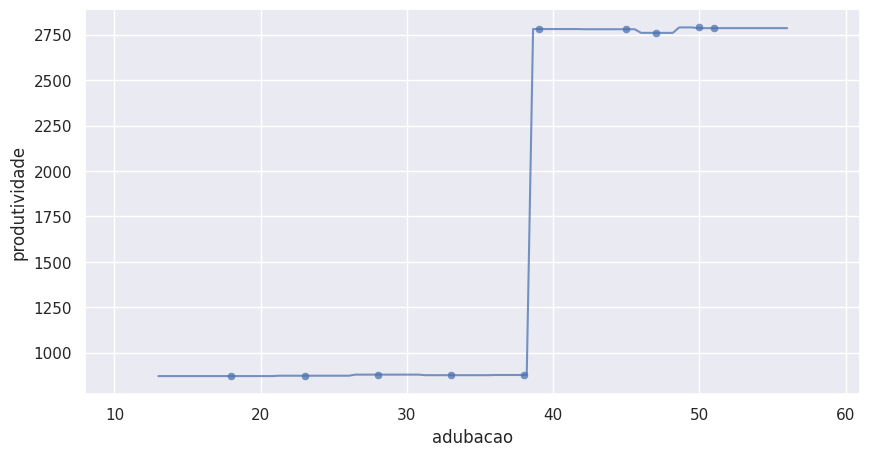

In [70]:
sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)
ax.set(xlim = (min(x)-10, max(x)+10),ylim=(min(y)-100, max(y)+100))
ax = sns.scatterplot(x="adubacao", y="produtividade", data=df, alpha=0.75);
ax = sns.lineplot(x="x_adubacao", y="y_produtividade", data=reta_df, alpha=0.75);

**Verificando o como o modelo se saiu**

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print("MSE: {:.3f}".format(mean_squared_error(y, y_pred)))
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y, y_pred))))
print("MAE: {:.3f}".format(mean_absolute_error(y, y_pred)))
print("MAPE: {:.3f}".format(mean_absolute_percentage_error(y, y_pred)))
print("R2: {:.3f}".format(r2_score(y, y_pred)))

################################################################################
# Cálculo do R2 ajustado:
def r2_ajustado(x, y, y_pred):
    """
    r2_ajustado retorna o R² Ajustado e recebe como argumento as séries com o
    valor alvo teste e o predito.
    """
    n = x.shape[0]
    k = x.shape[1]
    return (1-((n-1)/(n-(k+1)))*(1-r2_score(y, y_pred)))
################################################################################

print("R2 Ajustado: {:.3}".format(r2_ajustado(x, y, y_pred)))

MSE: 1.600
RMSE: 1.265
MAE: 0.400
MAPE: 0.000
R2: 1.000
R2 Ajustado: 1.0


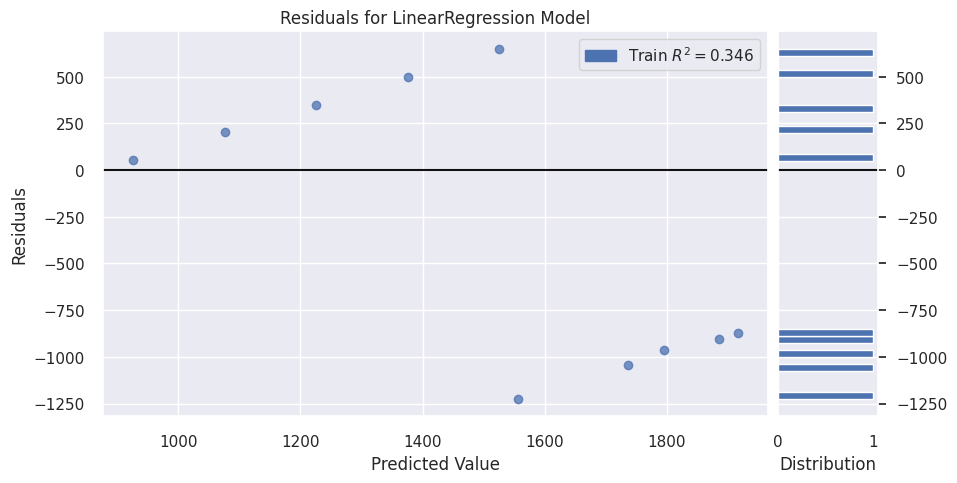

In [72]:
from yellowbrick.regressor import ResidualsPlot

sns.set()
dimensoes = (10,5)
fig, ax = plt.subplots(figsize=dimensoes)

visualizador = ResidualsPlot(regressor)
visualizador.fit(x, y)
visualizador.poof();